In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# SIR model

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

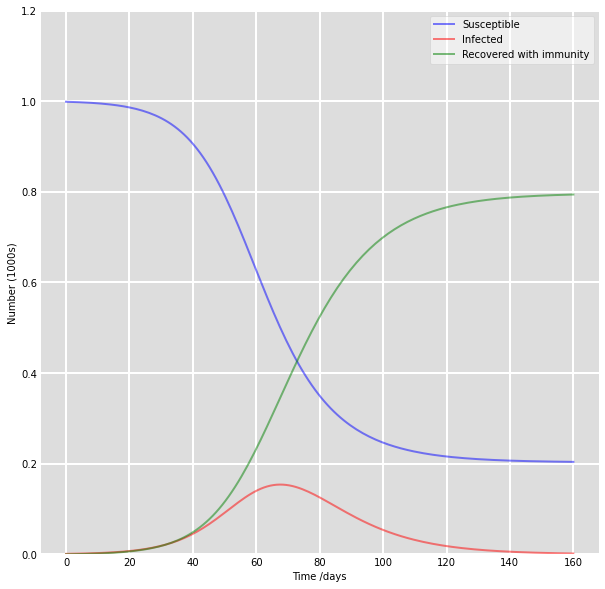

In [3]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# SIRD model

In [4]:
# Total population, N.
N = 1000
# Initial number of infected, recovered, and dead individuals, I0, R0, and D0.
I0, R0, D0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - D0
# Contact (or infection) rate, beta, and mean recovery rate, gamma, (in 1/days).
# Mortality rate, mu (in 1/days)
beta, gamma, mu = 0.2, 0.1/10, 0.05/10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIRD equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T

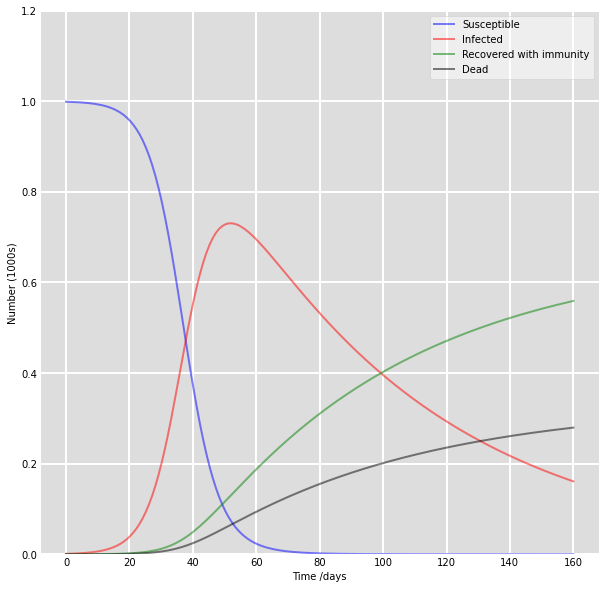

In [5]:
# Plot the data on three separate curves for S(t), I(t), R(t), and D(t)
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'k', alpha=0.5, lw=2, label='Dead')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Government Response and Policy

In [6]:
oxfordGovResponseLoc = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"
govResponseFr = pd.read_csv(oxfordGovResponseLoc)

In [7]:
govResponseFr['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
       'Honduras', 'Croatia',

In [8]:
# Print list of columns
govResponseFr.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIn

In [9]:
def convertDateToReadableFormat(dateList):
    '''
    Convert date to mm/dd/yy - same as done in JHU data
    '''
    dtObjectList = []
    for dateInt in dateList:
        dateStr = str(dateInt)
        x = datetime(int(dateStr[:4]), int(dateStr[4:6]), int(dateStr[6:8]))
        dtObjectList.append(x)
    dateTimeList = [dtObject.strftime('%m/%d/%y') for dtObject in dtObjectList]
    return dateTimeList, dtObjectList

def getColumnAsTimeSeriesDict(dataFr, colName):
    '''
    Get a dict with keys as countries and values as a list of any column of the data frame
    '''
    countryColTimeSeriesDict = {}
    for countryName in list(dataFr['CountryName'].unique()):
        # Extract data frame for each country
        countryGovResponseFr = dataFr[dataFr['CountryName'] == countryName]
        # Get the StringencyIndexForDisplay column as a list
        countryColTimeSeriesList = countryGovResponseFr[colName].to_list()
        # Store the lists in the dict with countryName as the key
        countryColTimeSeriesDict[countryName] = countryColTimeSeriesList
    return countryColTimeSeriesDict

def plotIndexByCountry(dataFr,
                       countryNameList,
                       index='StringencyIndexForDisplay',
                       every_nth=10,
                       impute_nan=True,
                       ylimValues=[0, 100],
                       yTickValues=np.arange(0, 101, 20)):
    '''
    Plot any index (or column) for a given list of countries
    '''
    colTimeSeriesDict = getColumnAsTimeSeriesDict(dataFr, index)
    fig = plt.figure(figsize=(10, 10), facecolor='w');
    ax = fig.add_subplot(111)
    for countryName in countryNameList:
        countryColTimeSeriesList = colTimeSeriesDict[countryName]
        # If there are nan values in data, replace with previous value
        # Note: there is no failsafe if first value in the list is nan
        if impute_nan:
            for i in range(len(countryColTimeSeriesList)):
                if np.isnan(countryColTimeSeriesList[i]):
                    countryColTimeSeriesList[i] = countryColTimeSeriesList[i-1]
        ax.plot(readableDateList, countryColTimeSeriesList, linewidth=3, label=countryName);
        
    # Add a little space below 0 and above the highest value
    plt.ylim([ylimValues[0] - 0.05*(ylimValues[1] - ylimValues[0]),
              ylimValues[1] + 0.05*(ylimValues[1] - ylimValues[0])]);
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.xticks(rotation=45, ha="right", fontsize=14);
    plt.yticks(yTickValues, fontsize=14);
    plt.grid(axis='y')
    plt.legend(loc='lower right', fontsize=14)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(index, fontsize=18)

In [10]:
# get list of dates
# date is in int
dateList = list(govResponseFr['Date'].unique())
readableDateList, _ = convertDateToReadableFormat(dateList)
# print(readableDateList)

## Stringency Index (SI)

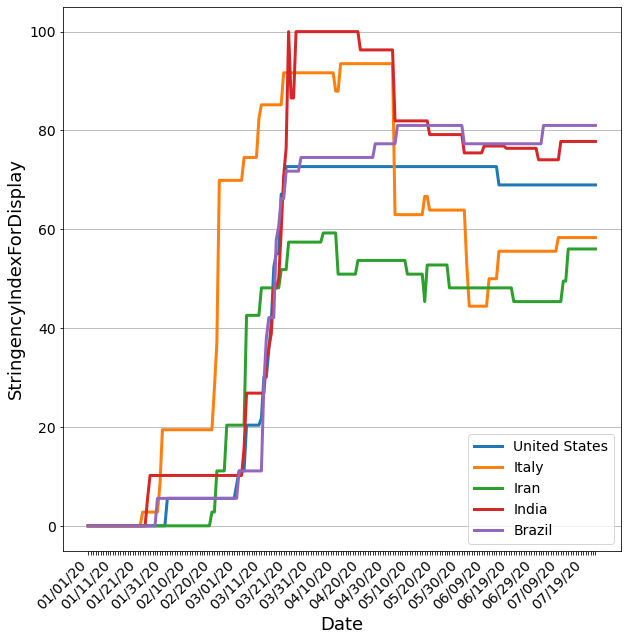

In [11]:
plotIndexByCountry(dataFr=govResponseFr,
                   countryNameList=['United States', 'Italy', 'Iran', 'India', 'Brazil'],
                   index='StringencyIndexForDisplay')


## Containment & Health Index (CHI)

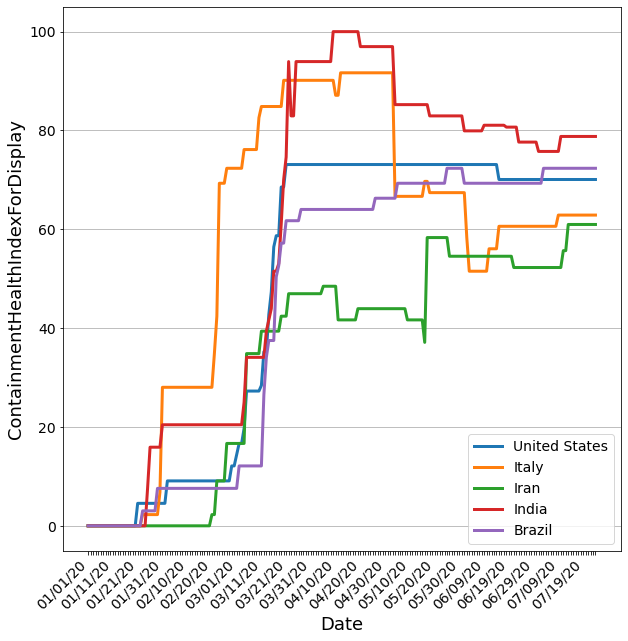

In [12]:
plotIndexByCountry(dataFr=govResponseFr,
                   countryNameList=['United States', 'Italy', 'Iran', 'India', 'Brazil'],
                   index='ContainmentHealthIndexForDisplay')

# Bin the SI and CHI into 5 levels

In [13]:
binIntervalList = [0, 20, 40, 60, 80, 100]
binLabelsList   = [0, 1, 2, 3, 4]

govResponse_SI_CHI_Fr = govResponseFr[['CountryName',
                                       'Date',
                                       'StringencyIndexForDisplay',
                                       'ContainmentHealthIndexForDisplay']].copy()

# Stringency Index Level
if 'SILevel' not in govResponse_SI_CHI_Fr.columns:
    govResponse_SI_CHI_Fr['SILevel'] = pd.cut(govResponse_SI_CHI_Fr['StringencyIndexForDisplay'],
                                              bins=binIntervalList,
                                              labels=binLabelsList)
    # cut API assigns NaN if index is 0
    # here is a quick fix
    indices = govResponse_SI_CHI_Fr[govResponse_SI_CHI_Fr['StringencyIndexForDisplay'] == 0].index
    govResponse_SI_CHI_Fr.loc[indices, 'SILevel'] = 0
    
# Containment & Health Index Level    
if 'CHILevel' not in govResponse_SI_CHI_Fr.columns:
    govResponse_SI_CHI_Fr['CHILevel'] = pd.cut(govResponse_SI_CHI_Fr['ContainmentHealthIndexForDisplay'],
                                               bins=binIntervalList,
                                               labels=binLabelsList)
    # cut API assigns NaN if index is 0
    # here is a quick fix
    indices = govResponse_SI_CHI_Fr[govResponse_SI_CHI_Fr['ContainmentHealthIndexForDisplay'] == 0].index
    govResponse_SI_CHI_Fr.loc[indices, 'CHILevel'] = 0
govResponse_SI_CHI_Fr

,CountryName,Date,StringencyIndexForDisplay,ContainmentHealthIndexForDisplay,SILevel,CHILevel
0,Aruba,20200101,0.00,0.00,0,0
1,Aruba,20200102,0.00,0.00,0,0
2,Aruba,20200103,0.00,0.00,0,0
3,Aruba,20200104,0.00,0.00,0,0
4,Aruba,20200105,0.00,0.00,0,0
...,...,...,...,...,...,...
36663,Kosovo,20200720,54.63,52.27,2,2
36664,Kosovo,20200721,54.63,52.27,2,2
36665,Kosovo,20200722,54.63,52.27,2,2
36666,Kosovo,20200723,54.63,52.27,2,2


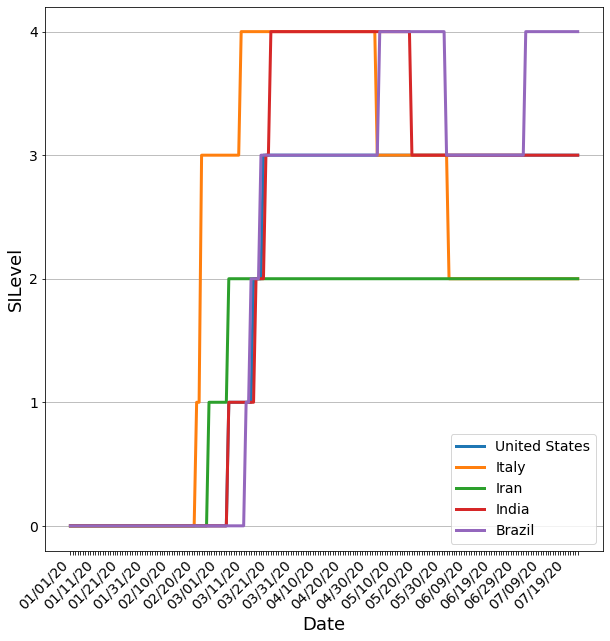

In [14]:
plotIndexByCountry(dataFr=govResponse_SI_CHI_Fr,
                   countryNameList=['United States', 'Italy', 'Iran', 'India', 'Brazil'],
                   index='SILevel',
                   ylimValues=[0, 4],
                   yTickValues=np.arange(0, 5))

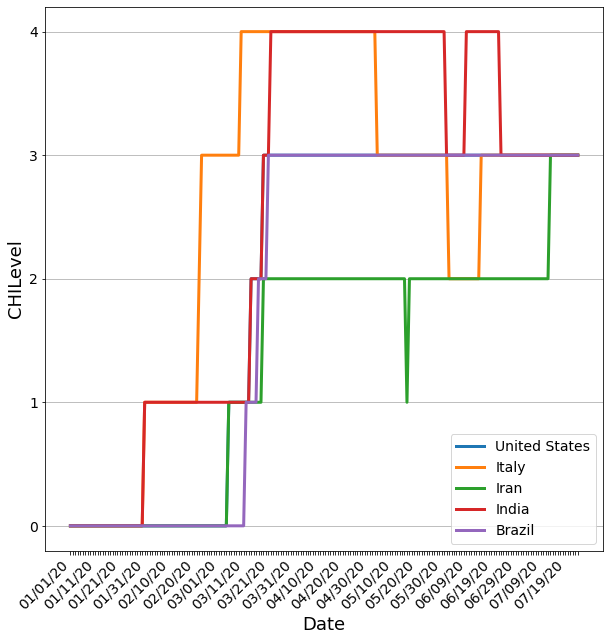

In [15]:
plotIndexByCountry(dataFr=govResponse_SI_CHI_Fr,
                   countryNameList=['United States', 'Italy', 'Iran', 'India', 'Brazil'],
                   index='CHILevel',
                   ylimValues=[0, 4],
                   yTickValues=np.arange(0, 5))

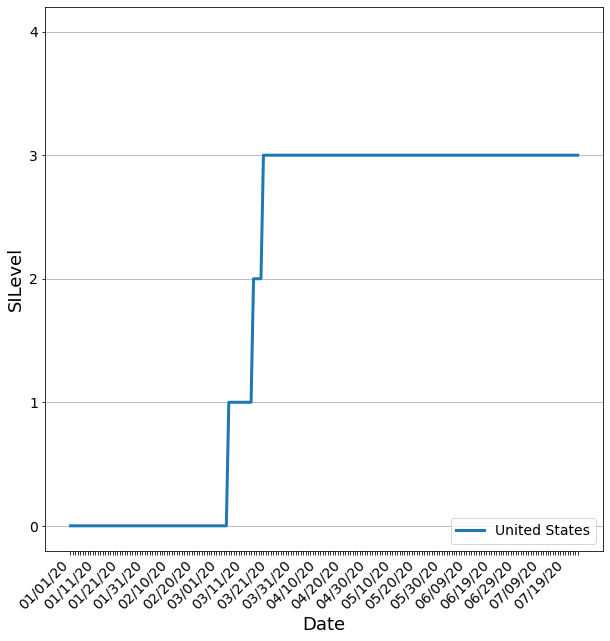

In [24]:
# Split data into partitions based on stringency Index level
plotIndexByCountry(dataFr=govResponse_SI_CHI_Fr,
                   countryNameList=['United States'],
                   index='SILevel',
                   ylimValues=[0, 4],
                   yTickValues=np.arange(0, 5))

countryName = 'United States'
SILevelTimeSeriesDict = getColumnAsTimeSeriesDict(govResponse_SI_CHI_Fr, 'SILevel')
countrySILevelTimeSeriesList = SILevelTimeSeriesDict[countryName]
countrySILevelTimeSeriesDict = dict(zip(readableDateList, US_SILevelTimeSeriesList))

SI = 0
datesWithSameSIListList = []
datesWithSameSIList = []
for key in US_SILevelTimeSeriesDict.keys():
    # Append date to list
    datesWithSameSIList.append(key)
    
    # If SI has changed, then we need to update list of lists and clean up the list of dates
    # Note that we are delaying the date by one day for update of SI to accommodate for the effect of 
    # policy change to start from the next day
    if US_SILevelTimeSeriesDict[key] != SI:
        # Append list of dates to list of lists
        datesWithSameSIListList.append(datesWithSameSIList)
        # Clean up list of dates
        datesWithSameSIList = []
        # Update SI with new SI
        SI = US_SILevelTimeSeriesDict[key]

# Append last list of dates
datesWithSameSIListList.append(datesWithSameSIList)

In [25]:
# Read number of confirmed, recovered, and dead from JHU
# Load all 3 csv files
covidFrDict = {}
covidFrDict['confirmed'] = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covidFrDict['deaths'] = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covidFrDict['recovered'] = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
# Function to get all three frames for a given country
def getCountryCovidFrDict(countryName):
    countryCovidFrDict = {}
    for key in covidFrDict.keys():
        dataFr = covidFrDict[key]
        countryCovidFrDict[key] = dataFr[dataFr['Country/Region'] == countryName]
    return countryCovidFrDict

countryCovidFrDict = getCountryCovidFrDict(countryName)